# C) Analyse de la candence 

# Signal Non filtré 

Nombre total de pics détectés : 28
Intervalle moyen entre les pics : 68.82 secondes
Cadence moyenne : 50.03 pas par minute


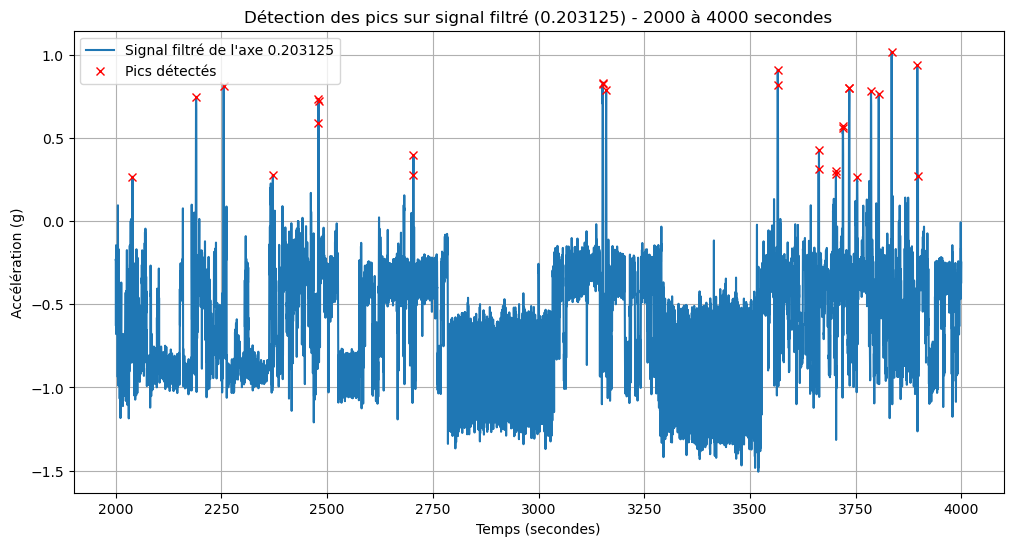

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Charger les données
file_path = "/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/Github/HAH913E-2024-projet/AX3 Project/Sans titre/data/NoneSmokerCardio.csv"
data = pd.read_csv(file_path)

timestamp_column = data.columns[0]
signal_columns = data.columns[1:]   # Toutes les colonnes restantes sont des signaux

# Appliquer une inversion des données si nécessaire (dans ce cas multipliées par -1)
data[signal_columns] = data[signal_columns] * -1

# Convertir la colonne de timestamp en datetime
data[timestamp_column] = pd.to_datetime(data[timestamp_column], errors='coerce')

# Calculer l'intervalle d'échantillonnage (en secondes)
sampling_interval = (
    pd.to_datetime(data[timestamp_column].iloc[1]) - 
    pd.to_datetime(data[timestamp_column].iloc[0])
).total_seconds()

# Créer une colonne pour le temps relatif (en secondes)
data['relative_time_seconds'] = data.index * sampling_interval

# Filtrer les données pour l'intervalle 2000 à 4000 secondes
data_filtered = data[(data['relative_time_seconds'] >= 2000) & 
                     (data['relative_time_seconds'] <= 4000)].copy()

# Sélectionner l'axe avec la plus grande variance
variances = data_filtered[signal_columns].var()
selected_axis = variances.idxmax()  # Trouver l'axe avec la plus grande variance

# Définir les paramètres du filtre passe-bas
fs = 1 / sampling_interval  # Fréquence d'échantillonnage en Hz
cutoff = 2  # Fréquence de coupure en Hz

# Fonction pour appliquer un filtre passe-bas
def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Appliquer le filtre passe-bas sur l'axe sélectionné
data_filtered[selected_axis] = lowpass_filter(data_filtered[selected_axis], cutoff, fs)

# Détecter les pics dans le signal filtré
peaks, _ = find_peaks(data_filtered[selected_axis], height=0.25, distance=fs * 0.1)  # Ajuster les paramètres si nécessaire

# Calculer les temps associés aux pics détectés
peak_times = data_filtered['relative_time_seconds'].iloc[peaks]

# Calculer les intervalles entre les pics (en secondes)
intervals = peak_times.diff().dropna()

# Calculer la cadence (pas par seconde)
cadence_per_second = 1 / intervals

# Convertir la cadence en pas par minute
cadence_per_minute = cadence_per_second * 60

# Afficher les statistiques
print(f"Nombre total de pics détectés : {len(peaks)}")
print(f"Intervalle moyen entre les pics : {intervals.mean():.2f} secondes")
print(f"Cadence moyenne : {cadence_per_minute.mean():.2f} pas par minute")

# Visualiser le signal filtré et les pics détectés
plt.figure(figsize=(12, 6))
plt.plot(data_filtered['relative_time_seconds'], data_filtered[selected_axis], label=f"Signal filtré de l'axe {selected_axis}")
plt.plot(peak_times, data_filtered[selected_axis].iloc[peaks], "x", label="Pics détectés", color='red')
plt.title(f"Détection des pics sur signal filtré ({selected_axis}) - 2000 à 4000 secondes")
plt.xlabel("Temps (secondes)")
plt.ylabel("Accélération (g)")
plt.legend()
plt.grid(True)
plt.show()


## Signal filtré
Nombre total de pics détectés : 295
Cela représente le total d'événements enregistrés. 
Intervalle moyen entre les pics : 19.33 secondes cela suggère une cadence plutôt lente.
Cadence moyenne : 75.05 pas par min.ute

Nombre total de pics détectés : 2971
Intervalle moyen entre les pics : 0.67 secondes
Cadence moyenne : 100.17 pas par minute


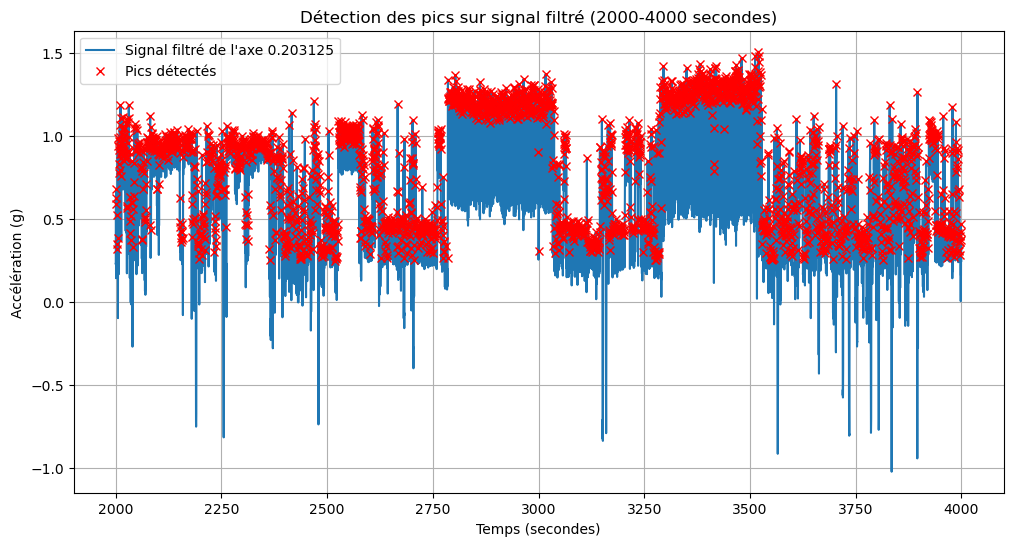

In [3]:
from scipy.signal import butter, filtfilt, find_peaks
import matplotlib.pyplot as plt
import pandas as pd

# Charger les données
file_path = "/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/Github/HAH913E-2024-projet/AX3 Project/Sans titre/data/NoneSmokerCardio.csv"
data = pd.read_csv(file_path)

# Convertir les colonnes de timestamps
timestamp_column = data.columns[0]
signal_columns = data.columns[1:]  # Toutes les colonnes sauf le timestamp
data[timestamp_column] = pd.to_datetime(data[timestamp_column], errors='coerce')

# Calculer l'intervalle d'échantillonnage (en secondes)
sampling_interval = (
    pd.to_datetime(data[timestamp_column].iloc[1]) - 
    pd.to_datetime(data[timestamp_column].iloc[0])
).total_seconds()

# Créer une colonne pour le temps relatif en secondes
data['relative_time_seconds'] = data.index * sampling_interval

# Filtrer les données pour l'intervalle 2000 à 4000 secondes
filtered_data = data[(data['relative_time_seconds'] >= 2000) & (data['relative_time_seconds'] <= 4000)].copy()

# Sélectionner l'axe avec la plus grande variance
signal_columns = data.columns[1:-1]  # Exclure le timestamp et le temps relatif
variances = filtered_data[signal_columns].var()
selected_axis = variances.idxmax()

# Fonction pour appliquer un filtre passe-bas
def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Appliquer le filtre passe-bas sur l'axe sélectionné
fs = 1 / sampling_interval  # Fréquence d'échantillonnage en Hz
cutoff = 2  # Fréquence de coupure en Hz
filtered_data[selected_axis] = lowpass_filter(filtered_data[selected_axis], cutoff, fs)

# Détecter les pics dans le signal filtré
peaks, _ = find_peaks(filtered_data[selected_axis], height=0.25, distance=fs * 0.1)

# Calculer les temps associés aux pics détectés
peak_times = filtered_data['relative_time_seconds'].iloc[peaks]

# Calculer les intervalles entre les pics (en secondes)
intervals = peak_times.diff().dropna()

# Calculer la cadence (pas par seconde)
cadence_per_second = 1 / intervals

# Convertir la cadence en pas par minute
cadence_per_minute = cadence_per_second * 60

# Afficher les statistiques
print(f"Nombre total de pics détectés : {len(peaks)}")
print(f"Intervalle moyen entre les pics : {intervals.mean():.2f} secondes")
print(f"Cadence moyenne : {cadence_per_minute.mean():.2f} pas par minute")

# Visualiser le signal filtré et les pics détectés
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['relative_time_seconds'], filtered_data[selected_axis], label=f"Signal filtré de l'axe {selected_axis}")
plt.plot(peak_times, filtered_data[selected_axis].iloc[peaks], "x", label="Pics détectés", color='red')
plt.title("Détection des pics sur signal filtré (2000-4000 secondes)")
plt.xlabel("Temps (secondes)")
plt.ylabel("Accélération (g)")
plt.legend()
plt.grid(True)
plt.show()
